<a href="https://colab.research.google.com/github/yhp2205/2023Project/blob/main/%EC%83%81%EC%9D%BC%EB%8F%99_%EA%B3%A8%EB%AA%A9%EC%83%81%EA%B6%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 상일동 골목상권 EDA

## 1. 개요

1. 데이터? 상일동 골목상권 6개년 데이터 (분기별)

2. 데이터 선정 이유
    - 팀원중 한명이 거주, 상일동에 대규모 재개발 진행으로 주택 공급 수 크게 증가
    - 이로인해서 골목 상권에 어떠한 영향을 줬는지 알아보고 싶어서 선정
    - 더해서 가장 변화가 큰 상권에 영향을 크게 준 인구통계학 정보를 통해, 재개발 도시의 인구 변화 추정해보고 싶어서 (팀원의 요청^^)
    

3. 데이터 소스
    - 서울시 열린 데이터 광장(https://data.seoul.go.kr/dataList/OA-15573/S/1/datasetView.do#)
    - 시기 : 2017년~2022년
    - 장소 : 상일동 골목상권 > 상일여고(상일초등학교)

3. 데이터 소스 상세
    - 서울시에서 규정한 상권은 총 4가지(골목상권, 발달상권, 전통시장, 관광특구)
    - 상일동 일대에 총 3개의 골목상권이 위치, 초록색 구역은 서울시에서 정해 놓은 골목상권.

    초록색 구역은 서울시에서 정해 놓은 골목상권.
상일동 일대에 총 3개의 골목상권이 위치.
이 중 5개 대형 아파트 단지에 골고루 가깝게 위치한 상일여고(상일초등학교) 골목상권이 가장 많은 영향을 받았을 것이라 추측.
우선 여기 한 곳의 변화만 살펴보자.

### 기획 의도

- 동네 주민의 제보 : 최근 몇 년 사이에 대형 재개발 공사 완료. [관련 기사](https://www.econovill.com/news/articleView.html?idxno=353701)

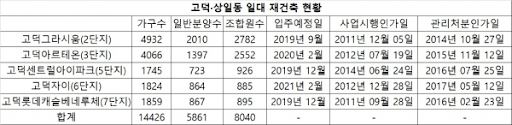

- 재건축 아파트 위치 확인. [서울시 상권분석 서비스](https://golmok.seoul.go.kr/main.do)

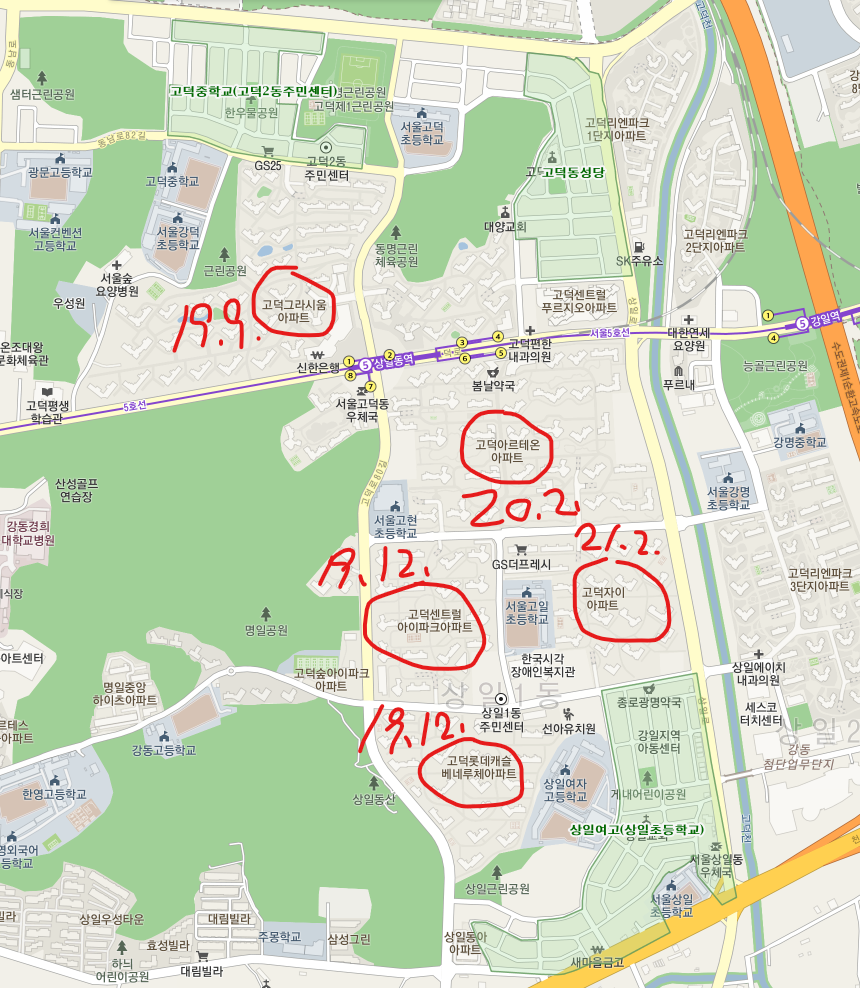

- 초록색 구역은 서울시에서 정해 놓은 골목상권.
- 상일동 일대에 총 3개의 골목상권이 위치.
- 이 중 5개 대형 아파트 단지에 골고루 가깝게 위치한 상일여고(상일초등학교) 골목상권이 가장 많은 영향을 받았을 것이라 추측.
- 우선 여기 한 곳의 변화만 살펴보자.

- 참고 : 골목상권이란?

  ‣ 30개 이상 점포 수를 포함한 골목길 영역에 위치하며, 서울시에 총 1,010개 골목상권으로 구성되며 보통 음식점, 소매업, 서비스업을 영위

  ‣ 보통 왕복 4차로 이상의 대로변 뒷골목에서 주로 주택이 밀집한 지역을 배후지로 하여 도보 이동 거리 내에 형성되며, 대형유통시설 인근 점포는 제외됨

  ‣ 공덕동 족발 거리, 종로구 평창길, 도봉구 방학로15길 등의 주거밀집지역 인근 좁은 골목길의 식당, 카페, 편의점 등의 상권이 형성된 곳

### 활용 데이터

- 서울시 열린 데이터 광장 : [서울시 상권분석서비스(상권배후지-추정매출)](https://data.seoul.go.kr/dataList/OA-15573/S/1/datasetView.do#)
  - 시기 : 2017년~2022년
  - 장소 : 서울시 내 상권배후지(골목상권)
  - 참고로 서울시에서 규정한 상권은 총 4가지(골목상권, 발달상권, 전통시장, 관광특구)인데 그 중 골목상권만 상권배후지 개념 존재.

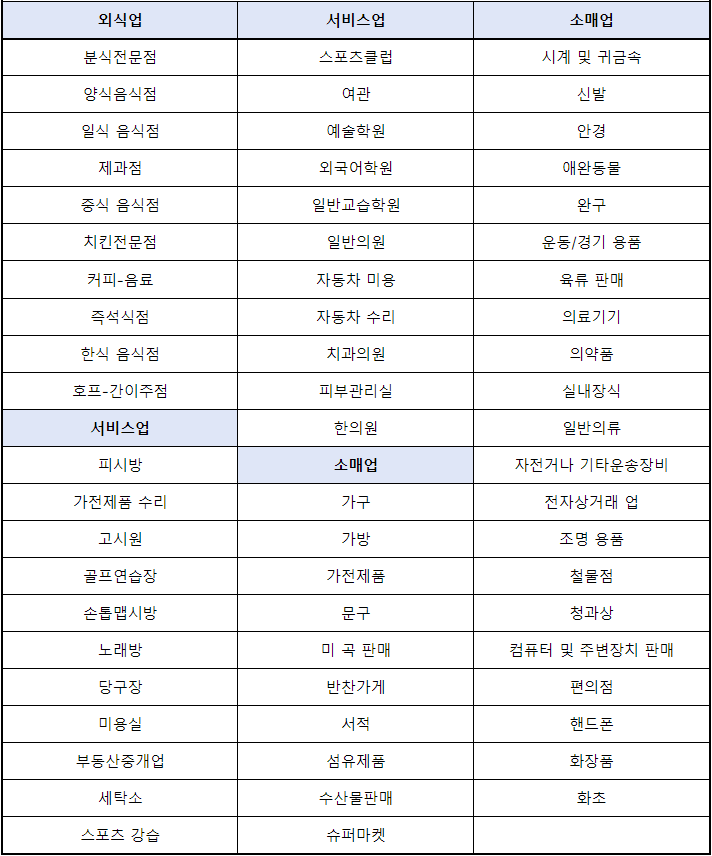

### 준비작업

#### drive mount

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 한글 폰트 설치 (완료 후 런타임 재시작)

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

#### package import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
plt.rc('font', family = 'NanumBarunGothic')

#### 년도별 파일 읽어오기

In [3]:
basePath = '/content/drive/MyDrive/구글클라우드인공지능개발자과정/miniProject/data_상권배후지_추정매출'

csvPath2022 = os.path.join(basePath, '서울시_상권분석서비스(상권배후지_추정매출)_2022년.csv')
df2022 = pd.read_csv(csvPath2022, encoding = 'cp949')
csvPath2021 = os.path.join(basePath, '서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2021년.csv')
df2021 = pd.read_csv(csvPath2021, encoding = 'cp949')
csvPath2020 = os.path.join(basePath, '서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2020년.csv')
df2020 = pd.read_csv(csvPath2020, encoding = 'cp949')
csvPath2019 = os.path.join(basePath, '서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2019년.csv')
df2019 = pd.read_csv(csvPath2019, encoding = 'cp949')
csvPath2018 = os.path.join(basePath, '서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2018년.csv')
df2018 = pd.read_csv(csvPath2018, encoding = 'cp949')
csvPath2017 = os.path.join(basePath, '서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2017년.csv')
df2017 = pd.read_csv(csvPath2017, encoding = 'cp949')

#### 년도별로 상일여고 골목상권(상권코드 2111089) 데이터만 골라서 합치고 파일 저장

In [4]:
for i in range(2017, 2023):
  globals()['sangil' + str(i)] = globals()['df' + str(i)][globals()['df' + str(i)]['상권_코드'] == 2111089].reset_index(drop = True)

In [5]:
merged_df = pd.concat([sangil2017, sangil2018, sangil2019, sangil2020, sangil2021, sangil2022])
path = os.path.join(basePath, 'sangil6year.csv')
merged_df.to_csv(path, encoding = 'cp949')

## 2. 분석 내용

### 준비작업

#### 상일여고 골목상권 데이터 파일 불러오기

In [6]:
basePath = '/content/drive/MyDrive/구글클라우드인공지능개발자과정/miniProject/data_상권배후지_추정매출'
csvPath = os.path.join(basePath, 'sangil6year.csv')
sangil_df = pd.read_csv(csvPath, encoding = 'cp949')

#### 년도 칼럼과 분기 칼럼을 합친 새 칼럼('기준년도_분기') 생성

In [7]:
# 기준 연, 분기별 코드 string으로 변환 후 새 칼럼으로 합치기
sangil_df['기준_년_코드'] = sangil_df['기준_년_코드'].astype(str)
sangil_df['기준_분기_코드'] = sangil_df['기준_분기_코드'].astype(str)
sangil_df['기준년도_분기'] = sangil_df[['기준_년_코드','기준_분기_코드']].agg("_".join, axis=1)

#### 생성한 칼럼 기준으로 파일 내 데이터 정렬

2017 ~ 2021년까지는 1분기에서 4분기 순으로 정렬이 되어 있는데, 2022년 데이터만 4분기부터 1분기 순으로 되어 있어 정렬 방식 통일시켜 줌.

In [8]:
sangil_df['기준년도_분기'].tail()

1017    2022_1
1018    2022_1
1019    2022_1
1020    2022_1
1021    2022_1
Name: 기준년도_분기, dtype: object

In [9]:
sangil_df.sort_values(by = ['기준년도_분기'], inplace=True)
sangil_df.reset_index(drop = True, inplace = True)

In [10]:
sangil_df['기준년도_분기'].tail()

1017    2022_4
1018    2022_4
1019    2022_4
1020    2022_4
1021    2022_4
Name: 기준년도_분기, dtype: object

### 전처리 : 결측치 관련 이슈

- 표면적인 결측치는 없음.

In [11]:
sangil_df.isnull().sum()

Unnamed: 0         0
기준_년_코드            0
기준_분기_코드           0
상권_구분_코드           0
상권_구분_코드_명         0
                  ..
연령대_40_매출_건수       0
연령대_50_매출_건수       0
연령대_60_이상_매출_건수    0
점포수                0
기준년도_분기            0
Length: 82, dtype: int64

- 다만 두 가지 관점에서 결측치 이슈가 존재함.

1) '점포수' 칼럼 내 결측치 : 22년 4개 분기, 7개 업종에 걸쳐서 총 24건의 값이 숫자가 아닌 문자 '*'. 이것들로 인해 해당 칼럼의 데이터타입을 int로 변경하는 게 불가능한 상황.

In [12]:
(sangil_df['점포수'] == '*').sum()

24

In [13]:
sangil_df[sangil_df['점포수'] == '*']['기준_년_코드'].unique()

array(['2022'], dtype=object)

In [14]:
sangil_df[sangil_df['점포수'] == '*']['기준_분기_코드'].unique()

array(['1', '2', '3', '4'], dtype=object)

In [15]:
sangil_df[sangil_df['점포수'] == '*']['서비스_업종_코드_명'].unique()

array(['자전거 및 기타운송장비', '네일숍', '골프연습장', '일반의원', '스포츠클럽', '청과상', '안경'],
      dtype=object)

각각 매출 금액과 매출 건수는 존재함. 별로 비중 있는 업종이 아니어서 행만 제외할 수도 있으나, 우선 점포수 칼럼 자체를 활용 보류.

2) 시계열 상 결측 : 시계열 범위가 6년이므로 한 업종 당 총 24개 분기의 데이터가 있어야 하나, 총 54개 업종 중 33개 업종만 모든 분기의 데이터가 존재하고, 나머지 21개 업종은 일부 분기의 데이터가 존재하지 않는 문제 발견.

In [16]:
len(sangil_df['서비스_업종_코드_명'].value_counts())

54

In [17]:
(sangil_df['서비스_업종_코드_명'].value_counts() != 24).sum()

21

그래프 통해서 수작업으로 일부 확인한 결과,
- PC방(1개 분기) : 19년 2분기
- 서적(1개 분기) : 19년 2분기
- 청과상(3개 분기) : 19년 4분기, 20년 1분기, 20년 2분기
- 애완동물(9개 분기) : 20년 4분기 이후
- 핸드폰(16개 분기) : 19년 1분기 이후
- 컴퓨터및주변장치판매(16개 분기) : 19년 1분기 이후
- 독서실(16개 분기) : 19년 1분기 이후

분기 데이터 결측이 많은 업종은 유의미한 시계열 분석이 어려울 것으로 판단.

---

### 업종 별 매출 금액 규모 비교

In [18]:
sangil_df1 = sangil_df.groupby('서비스_업종_코드_명').sum().sort_values('분기당_매출_금액', ascending = False)
sangil_df1.reset_index(inplace = True)

<ipython-input-18-da27dfce84fb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sangil_df1 = sangil_df.groupby('서비스_업종_코드_명').sum().sort_values('분기당_매출_금액', ascending = False)


<ipython-input-19-a9fb01470888>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


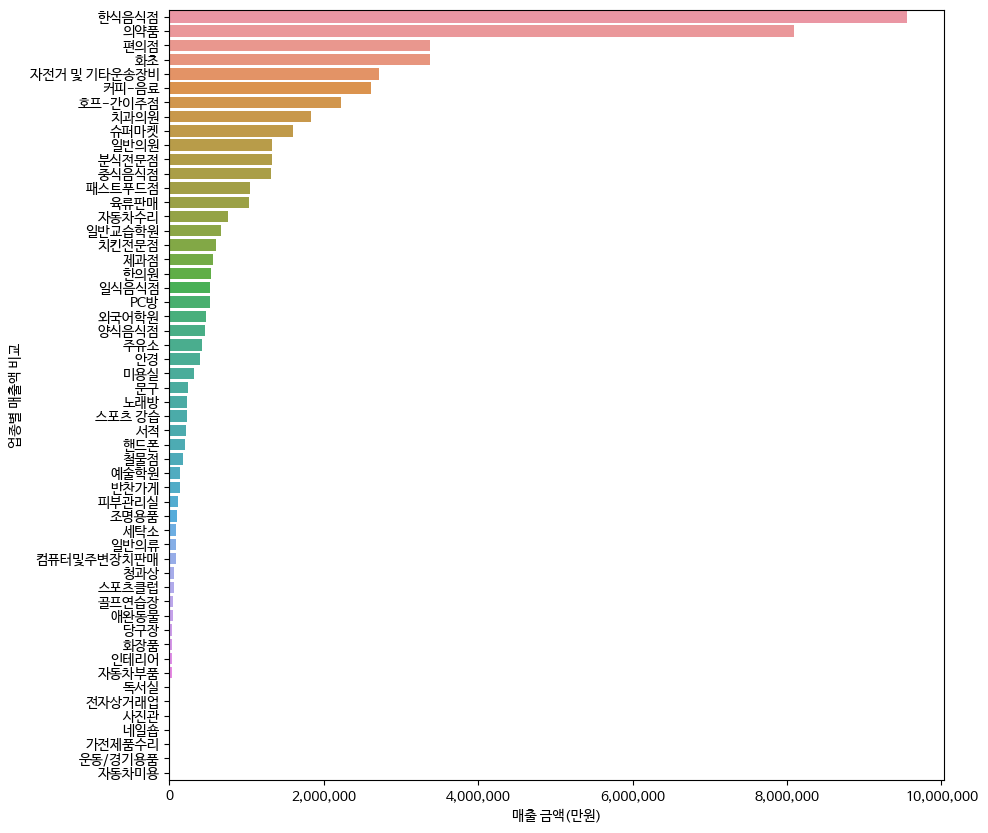

In [19]:
plt.rcParams["figure.figsize"] = (10,10)
df3plot = sns.barplot(data = sangil_df1,
            x = '분기당_매출_금액',
            y = '서비스_업종_코드_명',
            orient='h')

df3plot.set_ylabel('업종별 매출액 비교', fontsize=10)
df3plot.set_xlabel('매출 금액(만원)', fontsize=10)


plt.ticklabel_format(axis='x',useOffset=False, style='plain')
current_values = plt.gca().get_xticks()/10000
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.gca().set_yticklabels(sangil_df1['서비스_업종_코드_명'], size = 10)

plt.show()

### 업종 별 시계열 매출 변화 추이

- 피벗테이블

In [20]:
pd.options.display.float_format = '{:.1f}'.format

sangil_sales = sangil_df.pivot(index='기준년도_분기', columns='서비스_업종_코드_명', values='분기당_매출_금액')

In [21]:
sangil_sales.head()

서비스_업종_코드_명,PC방,가전제품수리,골프연습장,네일숍,노래방,당구장,독서실,문구,미용실,반찬가게,...,컴퓨터및주변장치판매,패스트푸드점,편의점,피부관리실,한식음식점,한의원,핸드폰,호프-간이주점,화장품,화초
기준년도_분기,,,,,,,,,,,,,,,,,,,,,
2017_1,60784860.0,4742849.0,49664899.0,1932527.0,154354715.0,26609287.0,19511140.0,85572030.0,87855456.0,NaN,...,51277400.0,472004941.0,1195451761.0,42823772.0,4085167566.0,323727220.0,165120332.0,1280685492.0,26178521.0,1561553951.0
2017_2,92113025.0,NaN,39201995.0,1576552.0,153462073.0,23991089.0,14696813.0,119222083.0,92697078.0,NaN,...,69687821.0,526216791.0,1387211857.0,56191551.0,4454090566.0,330743563.0,154524598.0,1172438804.0,40130954.0,1830274915.0
2017_3,129278591.0,NaN,39364691.0,2595355.0,174199445.0,25042581.0,6667293.0,129161334.0,88913106.0,NaN,...,86644598.0,480233743.0,1530945608.0,61294617.0,4002093035.0,321929595.0,378366590.0,1139897417.0,46396602.0,940660688.0
2017_4,197746295.0,NaN,37303260.0,468241.0,173044649.0,21854364.0,12378490.0,118161045.0,76109756.0,NaN,...,159265331.0,404409979.0,1301470270.0,53854689.0,3735010060.0,243769159.0,257187827.0,1108882586.0,39451713.0,1061917367.0
2018_1,246392071.0,NaN,32127024.0,2483603.0,150812275.0,21559858.0,10999342.0,98513663.0,90232239.0,NaN,...,141388927.0,409543951.0,1402567323.0,24933387.0,3896938695.0,274311815.0,260060376.0,1332253305.0,50909946.0,1386797767.0


- 상위 10개 업종만 추려서 그래프 그려보기

In [22]:
sangil_sales.sum().sort_values(ascending = False).head(10)

서비스_업종_코드_명
한식음식점          95587862546.0
의약품            80962585793.0
편의점            33807382430.0
화초             33717717555.0
자전거 및 기타운송장비   27220556394.0
커피-음료          26174416909.0
호프-간이주점        22275907639.0
치과의원           18295244964.0
슈퍼마켓           16077383586.0
일반의원           13328317508.0
dtype: float64

In [23]:
sangil_sales = sangil_sales[sangil_sales.sum().sort_values(ascending = False).head(10).index]

<ipython-input-24-60be7864e3c9>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


Text(0, 0.5, '매출(만원)')

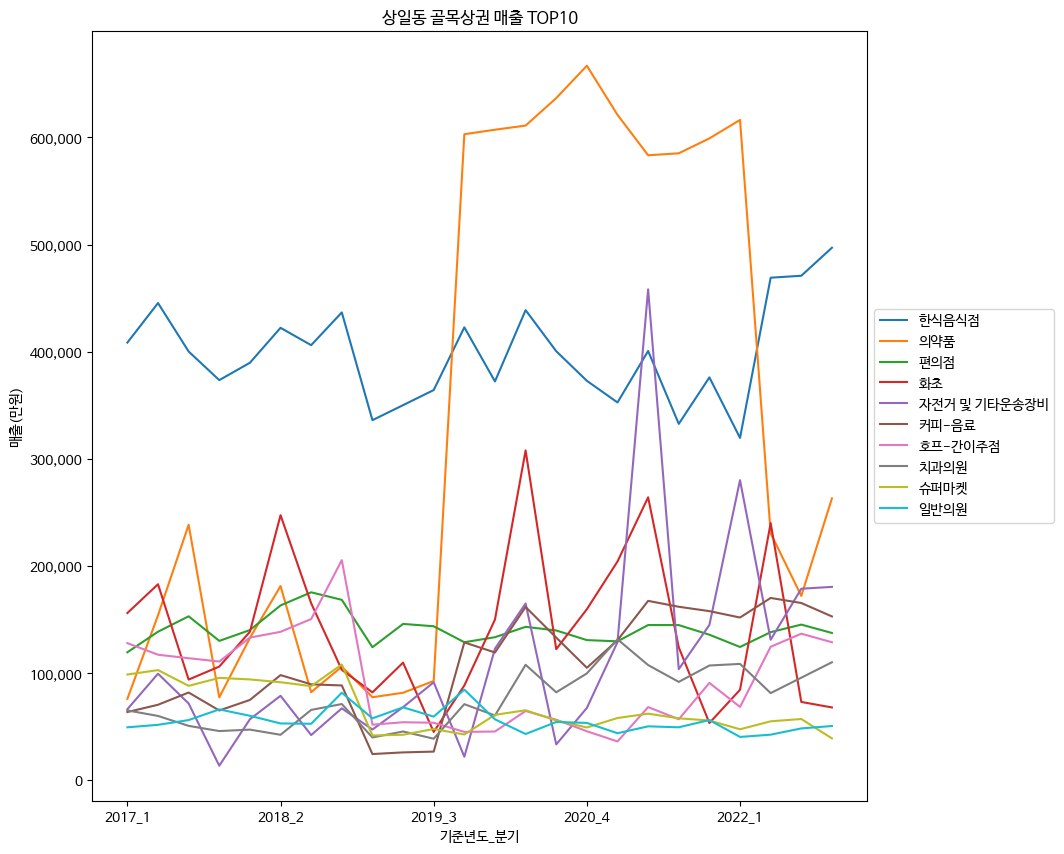

In [24]:
ax3 = sangil_sales.plot(title = '상일동 골목상권 매출 TOP10')
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
current_values = plt.gca().get_yticks()/10000
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax3.set_ylabel("매출(만원)")

- 전체 업종 대상으로 비슷한 업종끼리 묶어보기

In [25]:
sangil_sales = sangil_df.pivot(index='기준년도_분기', columns='서비스_업종_코드_명', values='분기당_매출_금액')

<ipython-input-26-6f48baec6173>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


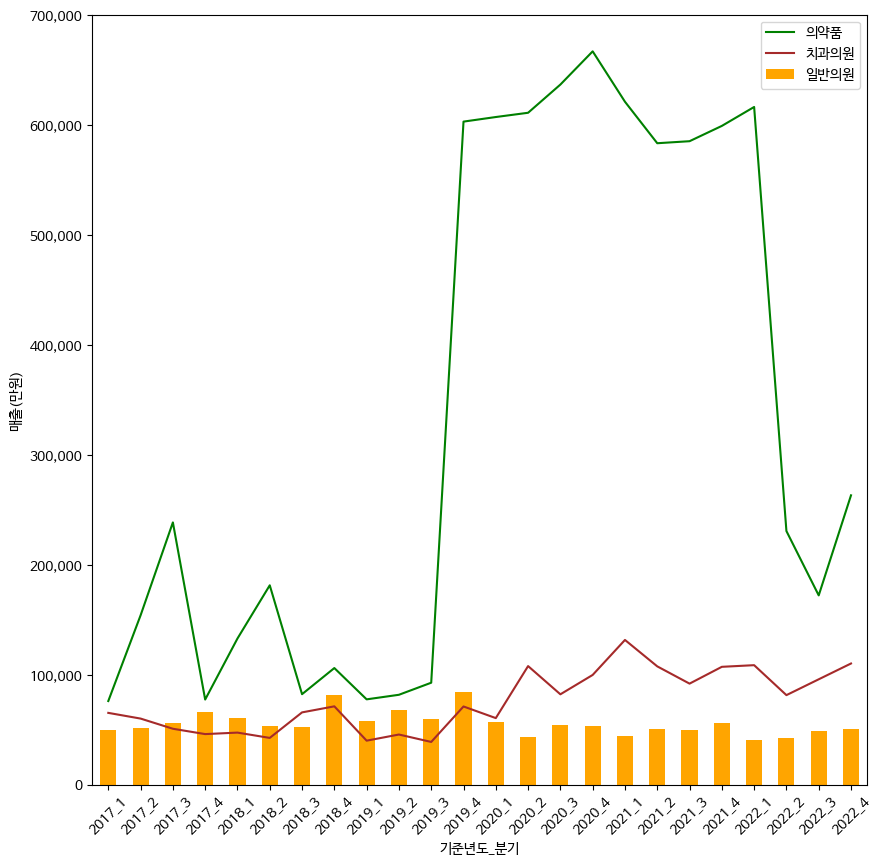

In [26]:
ax = sangil_sales['의약품'].plot.line(color='green')
ax = sangil_sales['치과의원'].plot.line(color='brown')
ax_2 = sangil_sales['일반의원'].plot.bar(ax=ax, color='orange')

plt.ticklabel_format(axis='y',useOffset=False, style='plain')
ax_2.set_xticklabels(sangil_sales.index, rotation=45)

current_values = plt.gca().get_yticks()/10000
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

ax_2.set_ylabel("매출(만원)")

ax_2.legend()

# 병, 의학 업졷 등 비슷한 업종을 모아서 확인한 결과,
# 일반의원이 큰 차이를 보이지 않는 것에 비해서, 의약품이 크게 상승 후 하락

<ipython-input-27-462dc51eb609>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


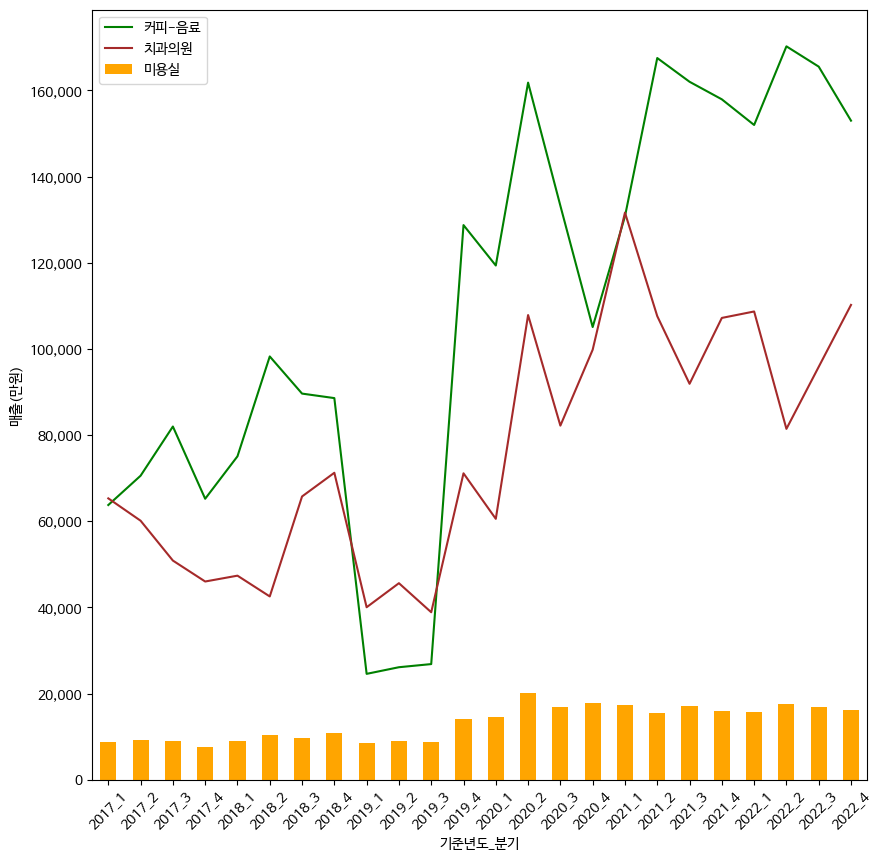

In [27]:
ax = sangil_sales['커피-음료'].plot.line(color='green')
ax = sangil_sales['치과의원'].plot.line(color='brown')
ax_2 = sangil_sales['미용실'].plot.bar(ax=ax, color='orange')

plt.ticklabel_format(axis='y',useOffset=False, style='plain')
ax_2.set_xticklabels(sangil_sales.index, rotation=45)

current_values = plt.gca().get_yticks()/10000
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

ax_2.set_ylabel("매출(만원)")

ax_2.legend()

# 치과의원 추세 상하였고, 커피, 미용실과 유사한 추세를 보였다.

<ipython-input-28-a3695a99e63f>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


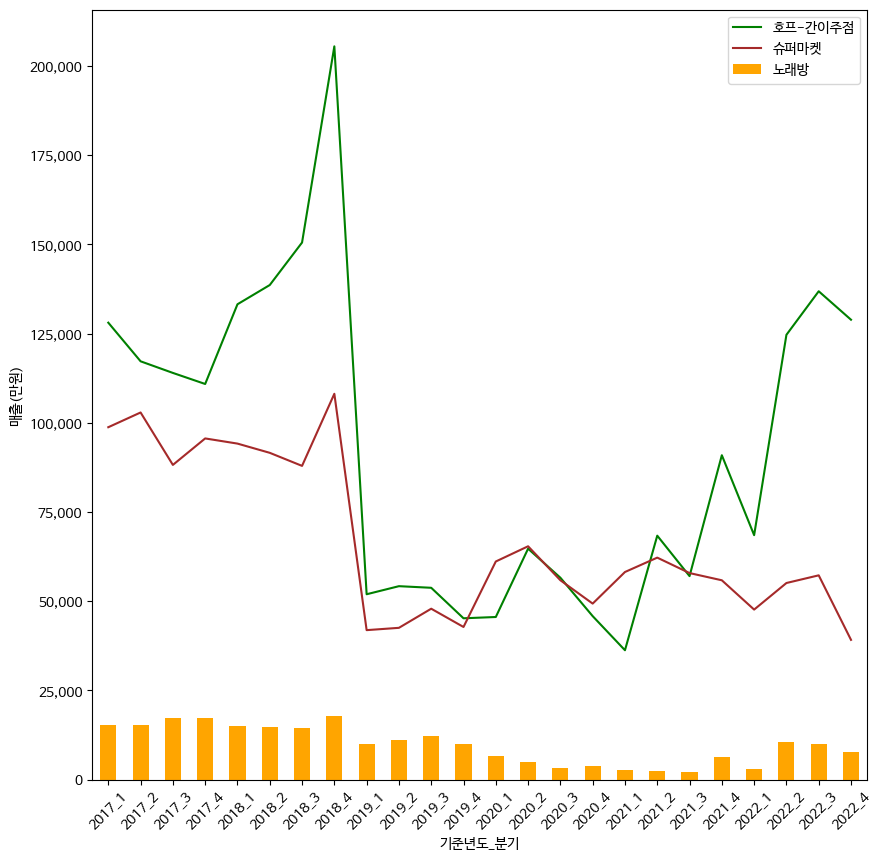

In [28]:
ax = sangil_sales['호프-간이주점'].plot.line(color='green')
ax = sangil_sales['슈퍼마켓'].plot.line(color='brown')
ax_2 = sangil_sales['노래방'].plot.bar(ax=ax, color='orange')

plt.ticklabel_format(axis='y',useOffset=False, style='plain')
ax_2.set_xticklabels(sangil_sales.index, rotation=45)

current_values = plt.gca().get_yticks()/10000
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

ax_2.set_ylabel("매출(만원)")

ax_2.legend()

# 크게 하락 한 업종의 경우 호프, 슈퍼마켓, 노래방이있었고, 코로나 이후 상승한 업종은 호프가 있었다.

<ipython-input-29-0992a527cb5f>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


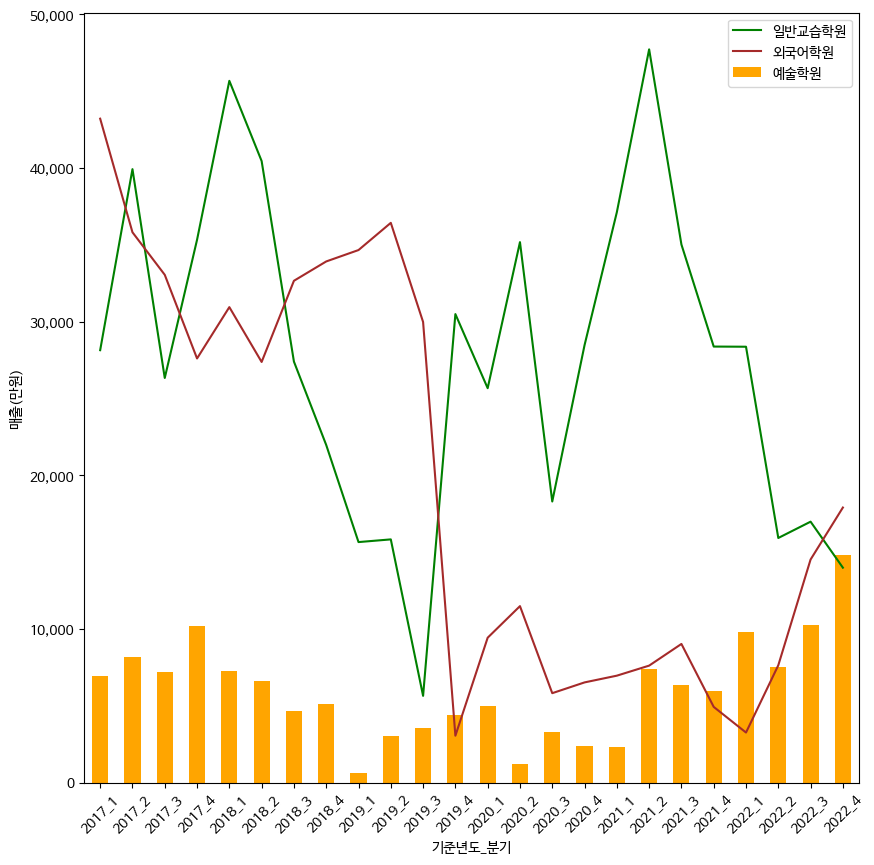

In [29]:
ax = sangil_sales['일반교습학원'].plot.line(color='green')
ax = sangil_sales['외국어학원'].plot.line(color='brown')
ax_2 = sangil_sales['예술학원'].plot.bar(ax=ax, color='orange')

plt.ticklabel_format(axis='y',useOffset=False, style='plain')
ax_2.set_xticklabels(sangil_sales.index, rotation=45)

current_values = plt.gca().get_yticks()/10000
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

ax_2.set_ylabel("매출(만원)")

ax_2.legend()

# 또다른 유사 업종 - 학원의 경우 일반교습학원은 코로나 시기에 상승 후 하락 하였고, 외국어학원의 경우 코로나 시기에 크게 하락 후 다시 상승하고 있습니다. 예술 학원의 경우 별다른 변화 없다가 최근 상승하고 있다.

<ipython-input-30-88d37e8fc031>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


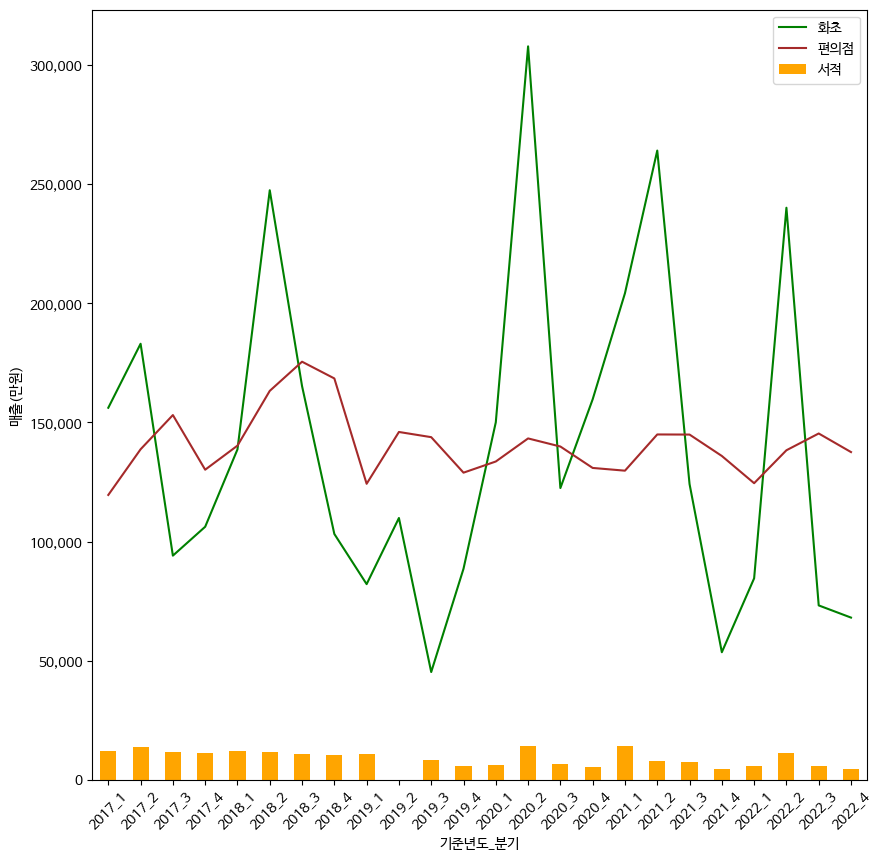

In [30]:
ax = sangil_sales['화초'].plot.line(color='green')
ax = sangil_sales['편의점'].plot.line(color='brown')
ax_2 = sangil_sales['서적'].plot.bar(ax=ax, color='orange')

plt.ticklabel_format(axis='y',useOffset=False, style='plain')
ax_2.set_xticklabels(sangil_sales.index, rotation=45)

current_values = plt.gca().get_yticks()/10000
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

ax_2.set_ylabel("매출(만원)")

ax_2.legend()

# 주기성을 보이는 업종은 화초와 편의점, 서적 등이 있었다.

- 특정 업종 내 매출 세분화

In [31]:
category = '의약품'
sangil_med = sangil_df[sangil_df['서비스_업종_코드_명'] == category]

1) 성별 세분화

In [32]:
sangil_med_mw = sangil_med[['기준년도_분기', '남성_매출_금액', '여성_매출_금액', '남성_매출_건수', '여성_매출_건수']]
sangil_med_mw.set_index('기준년도_분기', inplace = True)

In [33]:
sangil_med_mw

,남성_매출_금액,여성_매출_금액,남성_매출_건수,여성_매출_건수
기준년도_분기,,,,
2017_1,409975686,322220673,38618,33172
2017_2,741331197,368537653,39493,34423
2017_3,1303345096,326922291,35854,32415
2017_4,420094944,328092784,40123,33947
2018_1,961438686,337263929,42967,34755
2018_2,1126837309,387739053,42095,33685
2018_3,456836634,316448152,38745,30237
2018_4,531197793,365571663,50258,38042
2019_1,436110085,334885551,39540,31508


<ipython-input-34-a5cb76f1f8b0>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


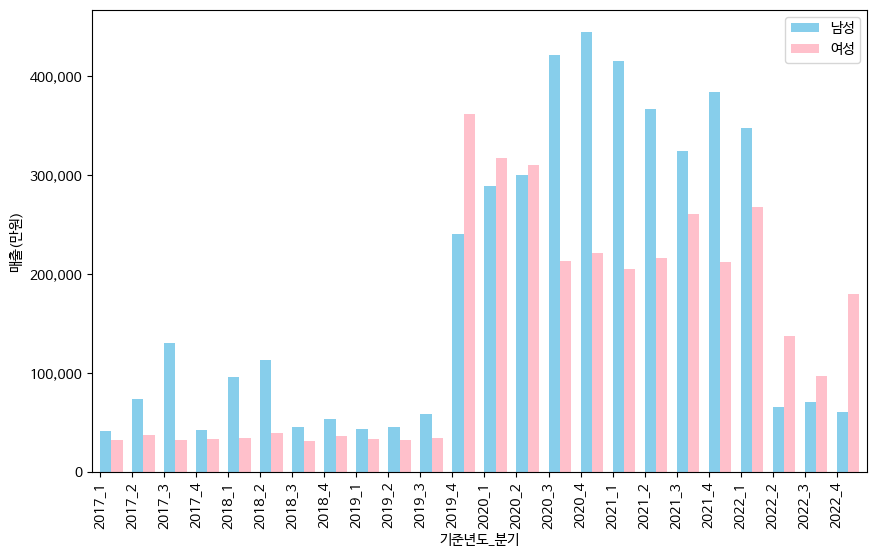

In [34]:
plt.rcParams["figure.figsize"] = (10,6)
labels = ['남성', '여성']
colors = ['skyblue', 'pink']
ax_m = sangil_med_mw.plot.bar(y = ['남성_매출_금액', '여성_매출_금액'],color=colors, width = 0.7, align='edge')
#ax_w = df2_mw['여성_매출_금액'].plot.bar(color='pink')

plt.ticklabel_format(axis='y',useOffset=False, style='plain')
#ax_w.set_xticklabels(df2_mw.index)

current_values = plt.gca().get_yticks()/10000
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

ax_m.set_ylabel("매출(만원)")
ax_m.legend(labels)

# 가장 큰폭으로 변화한 업종인 의학품에 대한 세부적인 그래프 확인, 성별 간의 매출의 변화와 차이가 코로나 기점으로 발생하였다.!

2) 연령별 세분화

In [35]:
sangil_med_age = sangil_med[['기준년도_분기', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']]
sangil_med_age.set_index("기준년도_분기", inplace = True)

<ipython-input-36-61de402d9d15>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


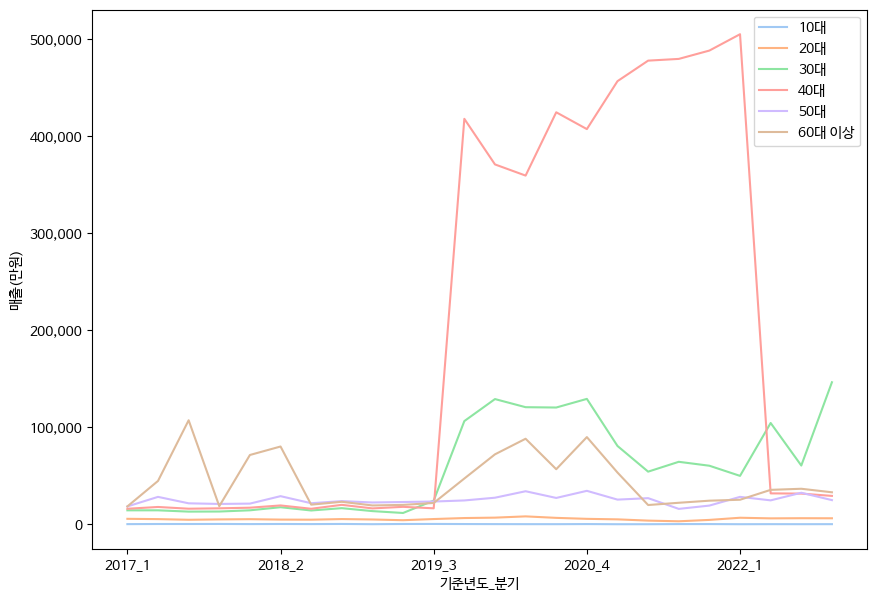

In [36]:
plt.rcParams["figure.figsize"] = (10,7)
labels = ['10대', '20대', '30대', '40대', '50대', '60대 이상']
colors = sns.color_palette('pastel')[0:6]
ax_med_age = sangil_med_age.plot.line(color = colors)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
#ax_w.set_xticklabels(df2_mw.index)

current_values = plt.gca().get_yticks()/10000
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

ax_med_age.set_ylabel("매출(만원)")
ax_med_age.legend(labels)

# 연령별 소비규모를 보면 40대가 코로나 전후로 가장 크게 증가하고 하락하였다.

In [37]:
sangil_med_age = sangil_med_age.transpose()

In [38]:
exp = [0, 0, 0, 0.1, 0, 0]
labels = ['10대', '20대', '30대', '40대', '50대', '60대 이상']
# time = '2018'
colors = sns.color_palette('pastel')[0:6]

def customPct(pct):
    return('%.1f%%'%pct)if pct >= 8 else''

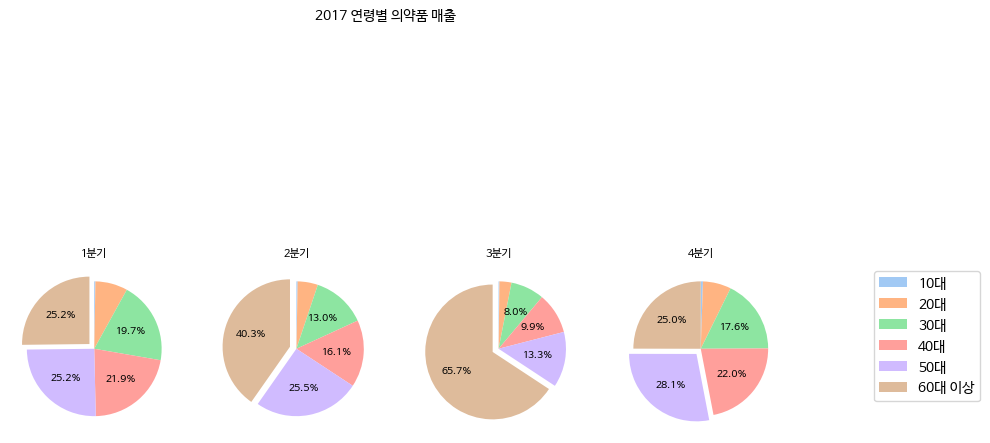

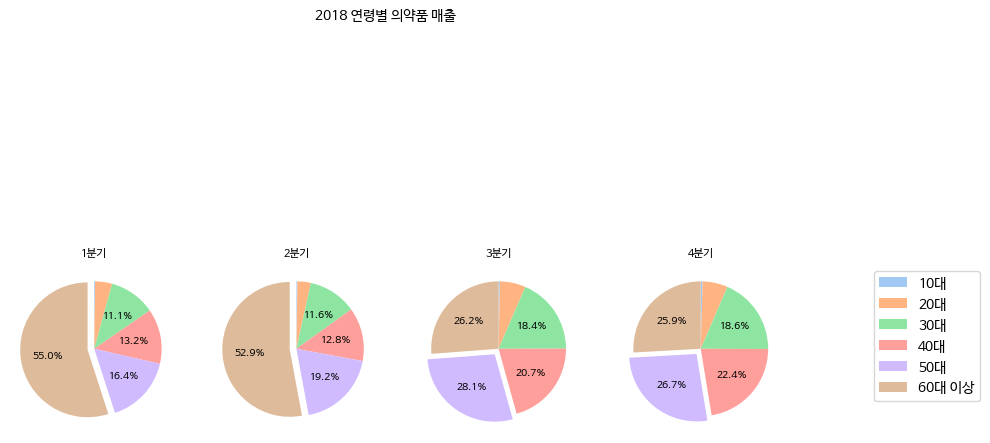

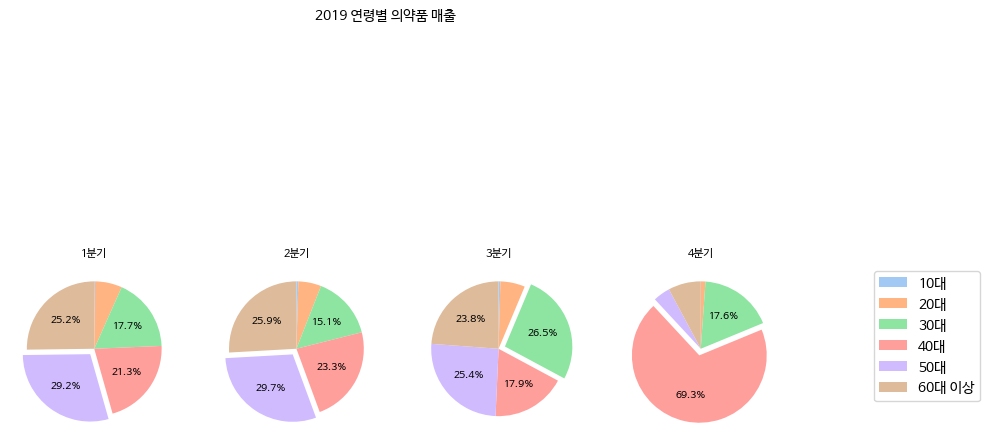

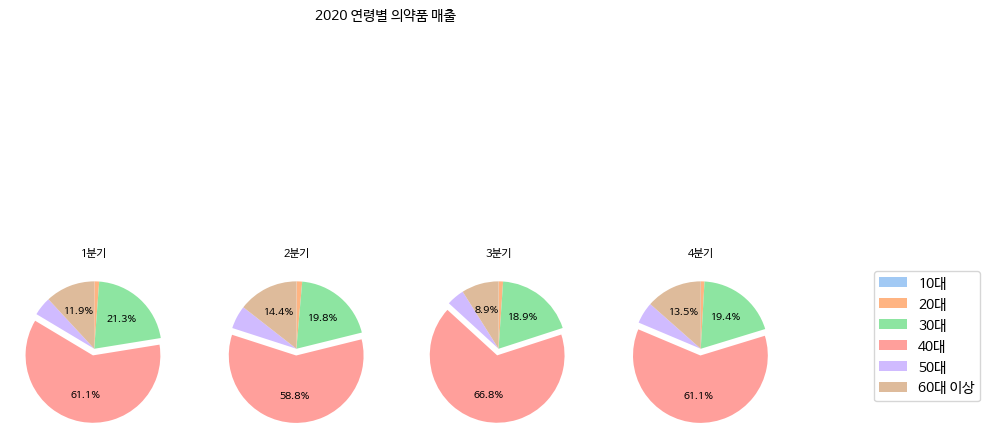

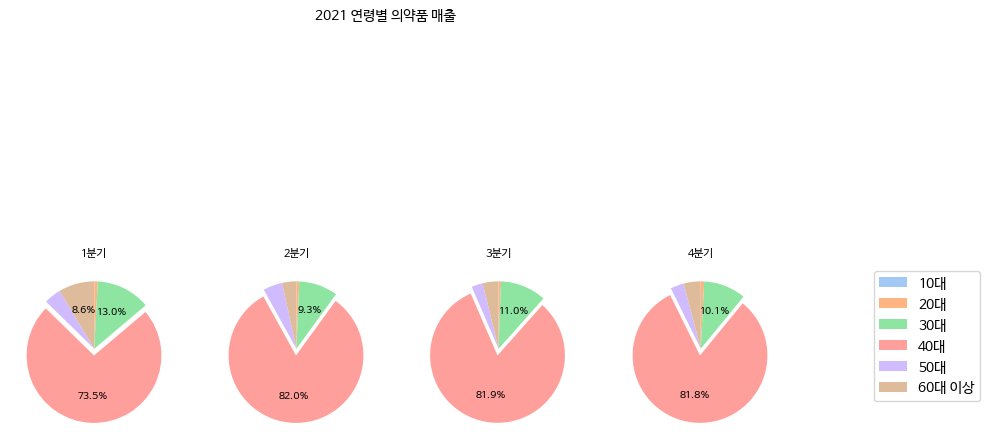

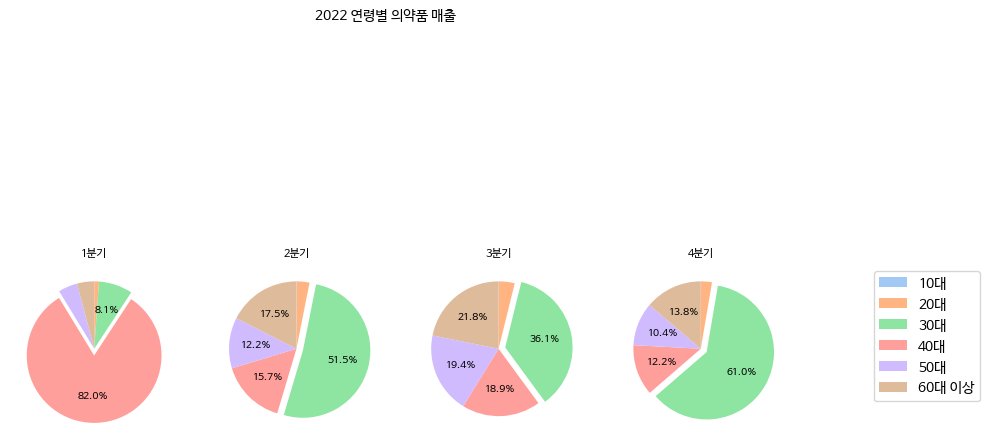

In [39]:
for i in range(2017, 2023):
  time = str(i)
  plt.suptitle(f'{time} 연령별 {category} 매출',fontsize=10)

  for j in range(1, 5):
    exp = []
    for k in range(6):
        if sangil_med_age[time+'_'+f'{j}'].index[k] == sangil_med_age[time+'_'+f'{j}'].idxmax():
            exp.append(0.1)
        else:
            exp.append(0)
    plt.subplot(1, 4, j)
    plt.pie(sangil_med_age[time +f'_{j}'],
            autopct=customPct,
            explode=exp,
            startangle = 90,
            counterclock=False,
            textprops={'fontsize': 7.5},
            colors= colors)
    plt.title(f'{j}분기', loc='center', fontsize = 8)
  plt.legend(labels, bbox_to_anchor=(2.2,1))
  plt.show()

# 분기별 연령별 파이차트를 통해 의약품 소비의 연령별 비율 상세하게 확인, 2018년 5 - 60대가 가장 많이 차지 하던 것이 2020년 4분기 기점으로 3 - 40대 비율이 크게 증가하였다.

## 3. 향후 발전 방향

- 상권 내
  - '점포수' 칼럼 활용
  - 다른 데이터 접목 : [골목상권분석정보](https://data.seoul.go.kr/dataList/3/literacyView.do)
- 상권 간 비교
  - [관련 분석 기사](https://www.thesegye.com/news/view/1065606880118375)